# Preparing Data

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import os
import glob
from tqdm import tqdm
import cv2 as cv

import tensorflow as tf

%load_ext watermark
%watermark -a "aneesh-aparajit" -p tensorflow,numpy,pandas,matplotlib,cv2

Author: aneesh-aparajit

tensorflow: 2.10.0
numpy     : 1.23.2
pandas    : 1.5.2
matplotlib: 3.6.2
cv2       : 4.6.0



In [2]:
class DataCFG:
    BASE_DIR = '../uw-madison-gi-tract-image-segmentation/train/'

cfg = DataCFG()

In [3]:
df = pd.read_csv('../uw-madison-gi-tract-image-segmentation/train.csv')
df.head()

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN


In [4]:
df.isna().sum()

id                  0
class               0
segmentation    81575
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115488 entries, 0 to 115487
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            115488 non-null  object
 1   class         115488 non-null  object
 2   segmentation  33913 non-null   object
dtypes: object(3)
memory usage: 2.6+ MB


In [6]:
if os.path.exists('../processed-v1/'):
    pass
else:
    os.mkdir('../processed-v1/')

In [7]:
df[~df['segmentation'].isna()]['segmentation'].apply(lambda x: (x.split()))

194       [28094, 3, 28358, 7, 28623, 9, 28889, 9, 29155...
197       [27561, 8, 27825, 11, 28090, 13, 28355, 14, 28...
200       [15323, 4, 15587, 8, 15852, 10, 16117, 11, 163...
203       [14792, 5, 15056, 9, 15321, 11, 15587, 11, 158...
206       [14526, 6, 14789, 12, 15054, 14, 15319, 16, 15...
                                ...                        
115459    [22540, 1, 22804, 5, 23069, 7, 23334, 10, 2360...
115461    [18746, 7, 19009, 23, 19038, 7, 19273, 44, 195...
115462    [23079, 1, 23343, 6, 23608, 9, 23874, 11, 2413...
115464    [18746, 2, 19010, 8, 19040, 3, 19274, 25, 1930...
115465    [21457, 6, 21722, 10, 21987, 15, 22252, 18, 22...
Name: segmentation, Length: 33913, dtype: object

In [8]:
df

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN
...,...,...,...
115483,case30_day0_slice_0143,small_bowel,NaN
115484,case30_day0_slice_0143,stomach,NaN
115485,case30_day0_slice_0144,large_bowel,NaN
115486,case30_day0_slice_0144,small_bowel,NaN


In [9]:
PATHS = []
HEIGHT = []
WIDTH = []
ID = []
TOTAL = 0
DAYS = 0

In [10]:
for case in tqdm(os.listdir(cfg.BASE_DIR)):
    if case == '.DS_Store':
        continue
    for day in os.listdir(os.path.join(cfg.BASE_DIR, case)):
        if day == '.DS_Store':
            continue
        DAYS += 1
        for file in os.listdir(os.path.join(cfg.BASE_DIR, case, day, 'scans')):
            if file == '.DS_Store':
                continue
            slices = file.split('_')
            _id = day + '_' + slices[0] + '_' + slices[1]
            ID.append(_id)
            HEIGHT.append(slices[2])
            WIDTH.append(slices[3])
            PATHS.append(os.path.join(cfg.BASE_DIR, case, day, 'scans', file))
            TOTAL += 1
            
        print(f'dir: {os.path.join(cfg.BASE_DIR, case, day, "scans")}, # of files: {len(os.path.join(cfg.BASE_DIR, case, day, "scans"))}')

  0%|                                                    | 0/86 [00:00<?, ?it/s]

dir: ../uw-madison-gi-tract-image-segmentation/train/case22/case22_day0/scans, # of files: 72
dir: ../uw-madison-gi-tract-image-segmentation/train/case49/case49_day15/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case49/case49_day0/scans, # of files: 72


 33%|█████████████▋                            | 28/86 [00:00<00:00, 279.90it/s]

dir: ../uw-madison-gi-tract-image-segmentation/train/case49/case49_day13/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case85/case85_day0/scans, # of files: 72
dir: ../uw-madison-gi-tract-image-segmentation/train/case85/case85_day23/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case85/case85_day21/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case85/case85_day29/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case85/case85_day27/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case78/case78_day22/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case78/case78_day30/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case78/case78_day0/scans, # of files: 72
dir: ../uw-madison-gi-tract-image-segmentation/train/case78/case78_day26/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train

dir: ../uw-madison-gi-tract-image-segmentation/train/case88/case88_day38/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case43/case43_day22/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case43/case43_day26/scans, # of files: 73


100%|██████████████████████████████████████████| 86/86 [00:00<00:00, 256.32it/s]

dir: ../uw-madison-gi-tract-image-segmentation/train/case43/case43_day18/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case43/case43_day0/scans, # of files: 72
dir: ../uw-madison-gi-tract-image-segmentation/train/case43/case43_day20/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case44/case44_day20/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case44/case44_day19/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case44/case44_day0/scans, # of files: 72
dir: ../uw-madison-gi-tract-image-segmentation/train/case19/case19_day14/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case19/case19_day22/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case19/case19_day12/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train/case19/case19_day18/scans, # of files: 73
dir: ../uw-madison-gi-tract-image-segmentation/train

In [11]:
DAYS, TOTAL

(274, 38496)

In [12]:
len(glob.glob('../uw-madison-gi-tract-image-segmentation/train/*/*/*/*.png'))

38496

In [13]:
df2 = pd.DataFrame({
    'id': ID,
    'img_path': PATHS,
    'WIDTH': WIDTH,
    'HEIGHT': HEIGHT
})

In [14]:
df.id.nunique()

38496

In [15]:
df = df.merge(df2, on='id')

## Run Length Encoding

This is lossless compression and it is versy simple to practice on. The concept of RLE compression is that check for the consecutive runs of the current pixel value. This algorithm works best on binary images.

Let's take an example image: `[1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0]`, have 16 pixels and it is binary. Now using RLE, we do something like below:
- At the begining, current pointer is first value i.e. 1. Now compressed image `[11]`. Which means 1 has repeated 1 times consecutively.
- Next, value is 0. Again, it is repeated 1 time, hence the compressed image is `[11 01]`.
    - This means 1 is repeated 1 times, and 0 repeated 1 times.
- Then, 1 occurs 3 times. So, it would be written as `[10 01 10 03]`.
- Similary, it would end as: `[11 01 10 03 12 01 12 03]`

In [16]:
df[~df['segmentation'].isna()]

,id,class,segmentation,img_path,WIDTH,HEIGHT
194,case123_day20_slice_0065,stomach,28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
197,case123_day20_slice_0066,stomach,27561 8 27825 11 28090 13 28355 14 28620 15 28...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
200,case123_day20_slice_0067,stomach,15323 4 15587 8 15852 10 16117 11 16383 12 166...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
203,case123_day20_slice_0068,stomach,14792 5 15056 9 15321 11 15587 11 15852 13 161...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
206,case123_day20_slice_0069,stomach,14526 6 14789 12 15054 14 15319 16 15584 17 15...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
...,...,...,...,...,...,...
115459,case30_day0_slice_0135,small_bowel,22540 1 22804 5 23069 7 23334 10 23600 11 2386...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
115461,case30_day0_slice_0136,large_bowel,18746 7 19009 23 19038 7 19273 44 19537 49 198...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
115462,case30_day0_slice_0136,small_bowel,23079 1 23343 6 23608 9 23874 11 24139 13 2440...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
115464,case30_day0_slice_0137,large_bowel,18746 2 19010 8 19040 3 19274 25 19302 12 1953...,../uw-madison-gi-tract-image-segmentation/trai...,266,266


In [17]:
df[~df['segmentation'].isna()].iloc[194]['segmentation']

'21915 6 22180 9 22444 11 22709 12 22974 14 23240 14 23506 13 23772 12 24039 10 24306 7'

In [18]:
df[df.id == 'case123_day20_slice_0065']['img_path'][194]

'../uw-madison-gi-tract-image-segmentation/train/case123/case123_day20/scans/slice_0065_266_266_1.50_1.50.png'

In [19]:
def rle_decode(mask_rle, shape):
    '''
    Extracted from: https://www.kaggle.com/code/paulorzp/run-length-encode-and-decode/script
    
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [20]:
def rle_encode(img):
    '''
    Extracted from: https://www.kaggle.com/code/paulorzp/run-length-encode-and-decode/script
    
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

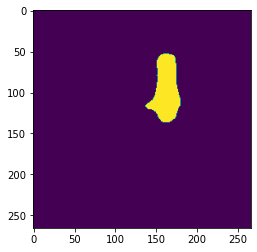

In [21]:
dec = rle_decode(df[~df['segmentation'].isna()].iloc[5]['segmentation'], (266, 266))

plt.imshow(dec);

In [22]:
df['class'].unique()

array(['large_bowel', 'small_bowel', 'stomach'], dtype=object)

In [23]:
colors = {
    'large_bowel': (1, 0, 0),
    'small_bowel': (0, 1, 0),
    'stomach': (0, 0, 1)
}

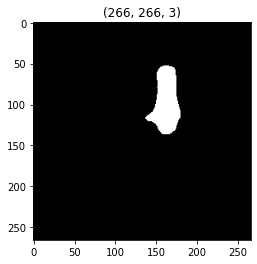

In [24]:
rgb = np.zeros((266, 266, 3))

for i in range(266):
    for j in range(266):
        rgb[i, j, :] = dec[i, j]

plt.imshow(rgb)
plt.title(rgb.shape);

In [25]:
dec.max()

1

In [26]:
def get_rgb_mask(
#     img_path: str,
    rle_sequence: str,
    _class: str,
    height: int,
    width: int
):
    dec = rle_decode(rle_sequence, (height, width))
    rgb = np.zeros((height, width, 3))

    for i in range(height):
        for j in range(width):
            if dec[i, j] == 1:
                rgb[i, j] = colors[_class]
    
#     rgb = np.uint8(rgb)
    return rgb

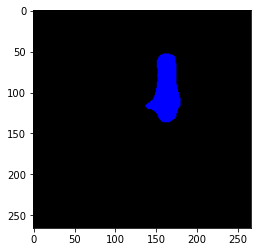

In [27]:
rgb = get_rgb_mask(df[~df['segmentation'].isna()].iloc[5]['segmentation'], 'stomach', 266, 266)
plt.imshow(rgb);

In [28]:
df = df.dropna().reset_index(drop=True)

In [29]:
df

,id,class,segmentation,img_path,WIDTH,HEIGHT
0,case123_day20_slice_0065,stomach,28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
1,case123_day20_slice_0066,stomach,27561 8 27825 11 28090 13 28355 14 28620 15 28...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
2,case123_day20_slice_0067,stomach,15323 4 15587 8 15852 10 16117 11 16383 12 166...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
3,case123_day20_slice_0068,stomach,14792 5 15056 9 15321 11 15587 11 15852 13 161...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
4,case123_day20_slice_0069,stomach,14526 6 14789 12 15054 14 15319 16 15584 17 15...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
...,...,...,...,...,...,...
33908,case30_day0_slice_0135,small_bowel,22540 1 22804 5 23069 7 23334 10 23600 11 2386...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
33909,case30_day0_slice_0136,large_bowel,18746 7 19009 23 19038 7 19273 44 19537 49 198...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
33910,case30_day0_slice_0136,small_bowel,23079 1 23343 6 23608 9 23874 11 24139 13 2440...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
33911,case30_day0_slice_0137,large_bowel,18746 2 19010 8 19040 3 19274 25 19302 12 1953...,../uw-madison-gi-tract-image-segmentation/trai...,266,266


In [30]:
df['WIDTH'] = df['WIDTH'].astype(int)
df['HEIGHT'] = df['HEIGHT'].astype(int)

In [31]:
df['WIDTH'].unique(), df['HEIGHT'].unique()

(array([266, 310, 234, 276]), array([266, 360, 234, 276]))

In [32]:
df.to_csv('../processed-v1/train.csv', index=False)

In [33]:
ids = df['id'].tolist()
ids[:10]

['case123_day20_slice_0065',
 'case123_day20_slice_0066',
 'case123_day20_slice_0067',
 'case123_day20_slice_0068',
 'case123_day20_slice_0069',
 'case123_day20_slice_0070',
 'case123_day20_slice_0071',
 'case123_day20_slice_0072',
 'case123_day20_slice_0073',
 'case123_day20_slice_0074']

In [34]:
MASK_PATHS = []

for _id in tqdm(ids):
    subset = df[df['id'] == _id].reset_index(drop=True)
    img = plt.imread(subset.iloc[0]['img_path'])
    final_mask = None
    for ix in range(len(subset)):
        _class = subset.iloc[ix]['class']
        rle_sequence = subset.iloc[ix]['segmentation']
        mask = get_rgb_mask(rle_sequence=rle_sequence, _class=_class, 
                            height=subset.iloc[ix]['HEIGHT'], width=subset.iloc[ix]['WIDTH'])
        
        if final_mask is None:
            final_mask = mask
        else:
            final_mask = cv.bitwise_or(final_mask, mask)
    
    plt.imsave(os.path.join('../processed-v1/masks', f'{_id}.png'), final_mask)
    plt.imsave(os.path.join('../processed-v1/imgs', f'{_id}.png'), img, cmap='gray')
    MASK_PATHS += [os.path.join('../processed-v1/masks', f'{_id}.png')] * len(subset)
#     plt.imshow(final_mask)
#     plt.show()
#     break

100%|███████████████████████████████████| 33913/33913 [1:29:07<00:00,  6.34it/s]


In [35]:
df[df['id'] == 'case123_day20_slice_0082'].reset_index(drop=True)

,id,class,segmentation,img_path,WIDTH,HEIGHT
0,case123_day20_slice_0082,large_bowel,17481 4 17746 7 18010 10 18275 12 18539 14 188...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
1,case123_day20_slice_0082,small_bowel,22236 2 22500 6 22765 8 23030 10 23296 10 2356...,../uw-madison-gi-tract-image-segmentation/trai...,266,266
2,case123_day20_slice_0082,stomach,11052 8 11314 15 11578 19 11843 23 12108 26 12...,../uw-madison-gi-tract-image-segmentation/trai...,266,266


In [36]:
MASK_PATHS[:10]

['../processed-v1/masks/case123_day20_slice_0065.png',
 '../processed-v1/masks/case123_day20_slice_0066.png',
 '../processed-v1/masks/case123_day20_slice_0067.png',
 '../processed-v1/masks/case123_day20_slice_0068.png',
 '../processed-v1/masks/case123_day20_slice_0069.png',
 '../processed-v1/masks/case123_day20_slice_0070.png',
 '../processed-v1/masks/case123_day20_slice_0071.png',
 '../processed-v1/masks/case123_day20_slice_0072.png',
 '../processed-v1/masks/case123_day20_slice_0073.png',
 '../processed-v1/masks/case123_day20_slice_0074.png']